## 六、以水星轨道数据为例子，绘制在两种情况下的轨迹方程

为了直观地比较牛顿力学和广义相对论对水星轨道的预测差异，我们将使用水星的实际轨道参数，分别绘制两种理论下的轨迹方程。

### 1. 水星轨道参数

以下是水星的近似轨道参数：

- 太阳质量：$M = 1.9885 \times 10^{30} \, \text{kg}$
- 水星质量：$m = 3.3011 \times 10^{23} \, \text{kg}$
- 水星轨道半长轴：$a = 5.791 \times 10^{10} \, \text{m}$
- 水星轨道离心率：$e = 0.2056$
- 万有引力常数：$G = 6.67430 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$
- 光速：$c = 3 \times 10^{8} \, \text{m/s}$

### 2. 牛顿力学下的轨道方程

在牛顿力学中，水星的轨道可以描述为一个椭圆，其轨道方程为：

$$
r(\theta) = \frac{a(1 - e^2)}{1 + e \cos \theta}
$$

### 3. 广义相对论下的轨道方程

广义相对论下，轨道方程为：

$$
\frac{d^2 u}{d \phi^2} + u = \frac{G M}{L^2} + \frac{3 G M}{c^2} u^2
$$

为了绘制轨道，我们需要数值求解该微分方程。以下是使用Python进行数值求解和绘图的示例代码。

### 4. 绘制轨迹方程的Python代码

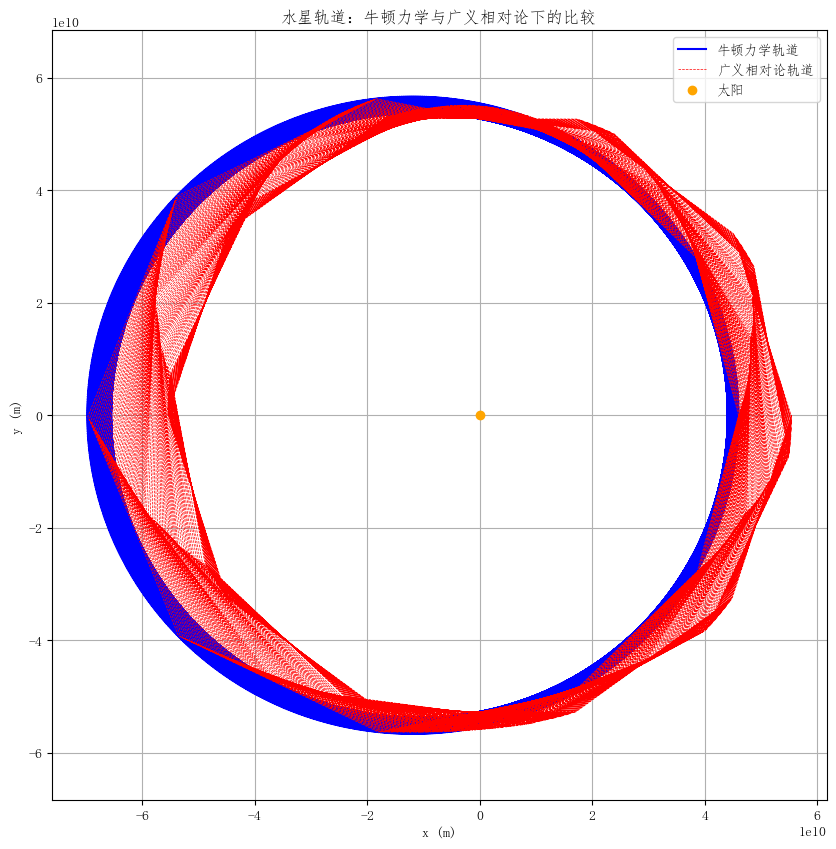

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib as mpl
mpl.rcParams["font.family"] = "FangSong"  # 设置字体
mpl.rcParams["axes.unicode_minus"] = False


# 常数定义
G = 6.67430e-11       # 万有引力常数, m^3 kg^-1 s^-2
c = 3.0e8             # 光速, m/s
M = 1.9885e30         # 太阳质量, kg
a = 5.791e10          # 半长轴, m
e = 0.2056            # 离心率

# 计算角动量 L = sqrt(G * M * a * (1 - e^2))
L = np.sqrt(G * M * a * (1 - e**2))

# 牛顿力学轨道方程（解析解）
def newtonian_orbit(theta, a, e):
    return (a * (1 - e**2)) / (1 + e * np.cos(theta))

# 广义相对论轨道方程（微分方程）
def gr_orbit_equations(theta, y, L, GM, c2):
    u, du_dtheta = y
    d2u_dtheta2 = (GM / L**2) + (3 * GM / c2) * u**2 - u
    return [du_dtheta, d2u_dtheta2]

# 参数设置
theta_max =  100000* 2 * np.pi  # 模拟50个完整周期
theta_eval = np.linspace(0, theta_max, 1000)  # 增加积分点数

# 初始条件
u0 = 1 / newtonian_orbit(0, a, e)  # 初始u = 1/r
du_dtheta0 = 0  # 在近日点，du/dtheta = 0
y0 = [u0, du_dtheta0]

# 数值积分
sol = solve_ivp(
    gr_orbit_equations,
    [0, theta_max],
    y0,
    args=(L, G*M, c**2),
    t_eval=theta_eval,
    method='Radau',  # 使用更稳定的积分方法
    rtol=1e-12,
    atol=1e-15
)

# 提取解
u_gr = sol.y[0]
theta_gr = sol.t
r_gr = 1 / u_gr

# 牛顿力学轨道
r_newton = newtonian_orbit(theta_eval, a, e)
x_newton = r_newton * np.cos(theta_eval)
y_newton = r_newton * np.sin(theta_eval)

# 广义相对论轨道
x_gr = r_gr * np.cos(theta_gr)
y_gr = r_gr * np.sin(theta_gr)

# 绘图
plt.figure(figsize=(10, 10))
plt.plot(x_newton, y_newton, label='牛顿力学轨道', color='blue')
plt.plot(x_gr, y_gr, label='广义相对论轨道', color='red', linestyle='--',linewidth = 0.5)
plt.plot(0, 0, 'o', color='orange', label='太阳')

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('水星轨道：牛顿力学与广义相对论下的比较')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [6]:
plt.savefig('mecury_orbit.pdf', format='pdf')

<Figure size 640x480 with 0 Axes>